In [2]:
import cv2
import os 
import matplotlib.pyplot as plt
from pathlib import Path
from keras.preprocessing import image
import numpy as np


Using TensorFlow backend.
c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\zeesh\anaco

In [3]:
p=Path(r"C:\Users\zeesh\OneDrive\Desktop\dataset")

dirs=p.glob("*")
image_data=[]
labels=[]
label_dict={"Pikachu":0,"Bulbasaur":1,"Charmander":2}
label2pokemon={0:"Pikachu",1:"Bulbasaur",2:"Charmander"}

for folder_dir in dirs:
    label=str(folder_dir).split("\\")[-1]
    cnt=0
    print(label)
    
    for img_path in folder_dir.glob("*.jpg"):
        img=image.load_img(img_path,target_size=(100,100))
        
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        
        labels.append(label_dict[label])
        cnt +=1
    print(cnt)
        

Bulbasaur
176
Charmander
200
mnist_test.csv
0
Pikachu
199


In [4]:
#p=Path(r"C:\Users\zeesh\OneDrive\Desktop\dataset")
#dirs=p.glob("*")
#for d in dirs:
 #   print(d)
    
#for img_path in folder_dir.glob("*.jpg"):
 #   print(img_path)
    

In [5]:
#visualise
#print(len(image_data))
#print(len(labels))

x=np.array(image_data)
y=np.array(labels)
print(x.shape)
#normalise
x=x/255.0

from sklearn.utils import shuffle
x,y=shuffle(x,y,random_state=2)
def drawImg(img,label):
    plt.title(label2pokemon[label])
    plt.imshow(img)
    plt.show()


(575, 100, 100, 3)


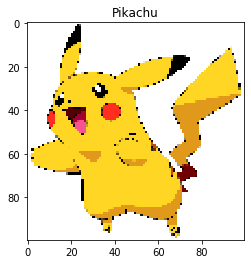

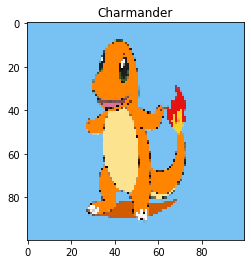

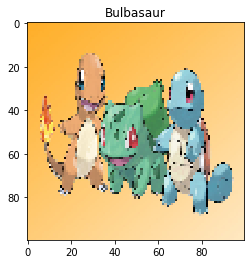

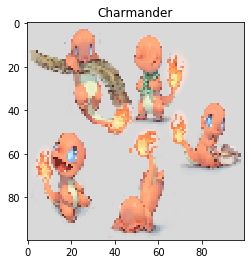

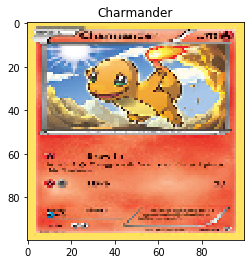

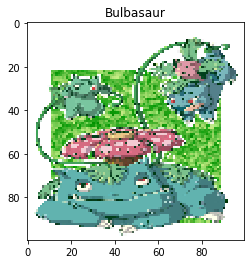

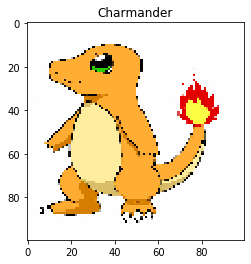

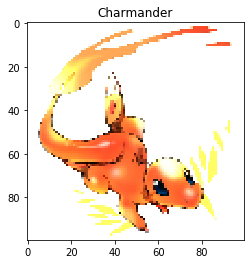

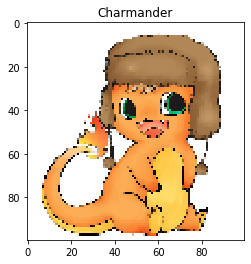

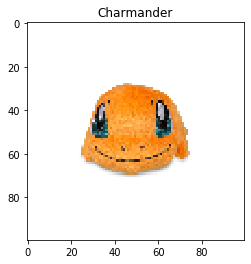

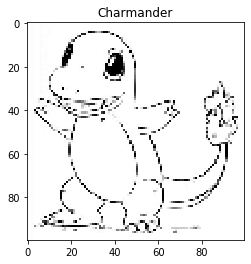

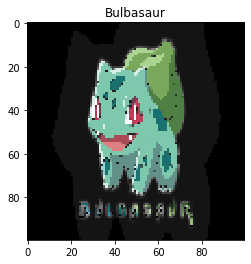

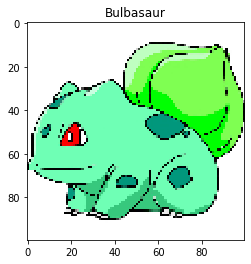

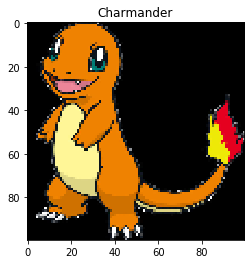

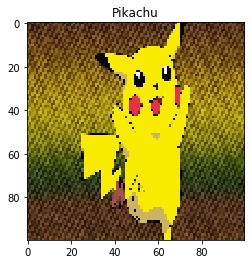

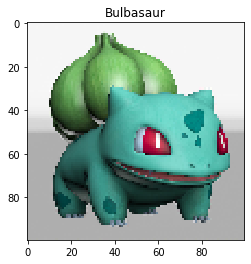

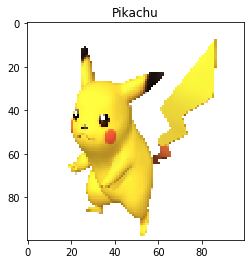

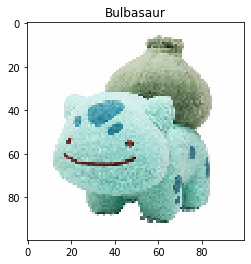

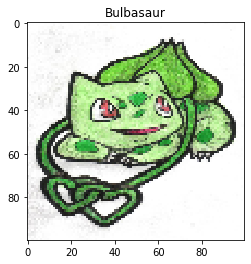

In [6]:
#drawImg(x[0],y[0])

for i in range(1,20):
    drawImg(x[i],y[i])

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

#xtrain=xtrain.reshape((-1,1))
#print(ytrain.shape)


In [8]:
def softmax(a):
    e=np.exp(a)
    ans=e/np.sum(e,axis=1,keepdims=True)
    return ans

In [9]:
class NeuralNetwork():
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model={}
        #first layer
        model['w1']=np.random.randn(input_size,layers[0])  ##3,4
        model['b1']=np.zeros((1,layers[0]))    ##1,4
        
        model['w2']=np.random.randn(layers[0],layers[1])  ##4,3
        model['b2']=np.zeros((1,layers[1]))         ##1,3
        
        model['w3']=np.random.randn(layers[1],output_size)  ##4,2
        model['b3']=np.zeros((1,output_size))      ###1,2
        #self.activation_output=()
        self.model=model
    def forward(self,x):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        z1=np.dot(x,w1) + b1    #x--> m,n w1-->n,layer1   ======m,4 +   1,4
        a1=np.tanh(z1)
        
        z2=np.dot(a1,w2) + b2  
        a2=np.tanh(z2)
        
        z3=np.dot(a2,w3) + b3
        y_=softmax(z3)
        self.activation_output=(a1,a2,y_)
        #print(y_.shape)
        return y_
    def backward(self,x,y,learning_rate):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_=self.activation_output
        m=x.shape[0]
        delta3=y_-y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)/float(m)
        
        delta2=(1-np.square(a2))*np.dot(delta3,w3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)/float(m)
        
        delta1=(1-np.square(a1))*np.dot(delta2,w2.T)
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)/float(m)
        
        ###update
        self.model['w1']-=learning_rate*dw1
        self.model['b1']-=learning_rate*db1
        
        self.model['w2']-=learning_rate*dw2
        self.model['b2']-=learning_rate*db2
        
        self.model['w3']-=learning_rate*dw3
        self.model['b3']-=learning_rate*db3
    def predict(self,x):
        y_out=self.forward(x)
        print(y_out.shape )
        return np.argmax(y_out,axis=1)      
   

In [10]:

def summary(self):
    w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
    a1,a2,y_=self.activation_output
        
    print("w1"%w1.shape)
    print("a1"%a1.shape)
        
    print("w2"%w2.shape)
    print("a2"%a2.shape)
              
    print("w3"%w3.shape)
    print("y_"%y_.shape)
def loss(y_oht,p):
    l=-np.mean(y_oht*np.log(p))
    return l
def onehot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

In [11]:
def train(x,y,model,epochs,learning_rate):
    training_loss=[]
    classes=3
    y_oht=onehot(y,classes)
    
    for ix in range(epochs):
        Y_=model.forward(x)
        l=loss(y_oht,Y_)
        training_loss.append(l)
        model.backward(x,y_oht,learning_rate)
        
    return training_loss        
        

In [12]:
model=NeuralNetwork(input_size=30000,layers=[100,50],output_size=3)

In [13]:
x=x.reshape(x.shape[0],-1)
print(x.shape)

xtest=xtest.reshape(x.shape[0],-1)

(575, 30000)


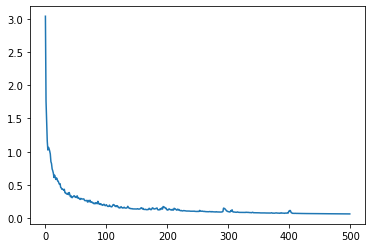

In [14]:
l=train(x,y,model,500,0.0002)
plt.plot(l)

In [15]:
out=model.predict(x)
train_acc=np.mean(y==out)
print(train_acc)

(575, 3)
0.9373913043478261
